In [239]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /anaconda3/lib/python3.6/site-packages (20.2.3)


In [244]:
!pip install --user --upgrade tensorflow

  Using cached tensorflow-2.3.1-cp36-cp36m-macosx_10_9_x86_64.whl (165.1 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached numpy-1.18.5-cp36-cp36m-macosx_10_9_x86_64.whl (15.1 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached h5py-2.10.0-cp36-cp36m-macosx_10_6_intel.whl (3.0 MB)
  Using cached tensorboard-2.3.0-py3-none-any.whl (6.8 MB)
  Using cached google_auth-1.22.1-py2.py3-none-any.whl (114 kB)
  Using cached google_auth_oauthlib-0.4.1-py2.py3-none-any.whl (18 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached cachetools-4.1.1-py3-none-any.whl (10 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PA

In [71]:
import tensorflow as tf
from tensorflow import keras
import tensorboard
print(tf.__version__)
print(keras.__version__)
print(tensorboard.__version__)

2.3.1
2.4.0
2.3.0


In [3]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### ***Perceptrons***

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [7]:
iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

In [8]:
plc = Perceptron()
plc.fit(X,y)
y_pred = plc.predict([[1, 0.5]])

In [9]:
y_pred

array([1])

### ***MLP using Keras API***

***Classification***

In [10]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [14]:
f_mnist = fashion_mnist.load_data()

In [17]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [21]:
X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

In [23]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [24]:
X_train_full.dtype, y_train_full.dtype

(dtype('uint8'), dtype('uint8'))

In [25]:
X_train, X_valid = X_train_full[:5000]/255, X_train_full[5000:,]/255
y_train, y_valid = y_train_full[:5000], y_train_full[5000:]

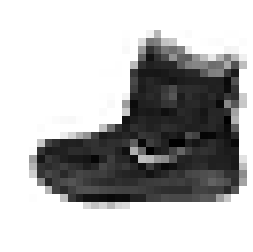

In [26]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [27]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [28]:
class_names[y_train[0]]

'Ankle boot'

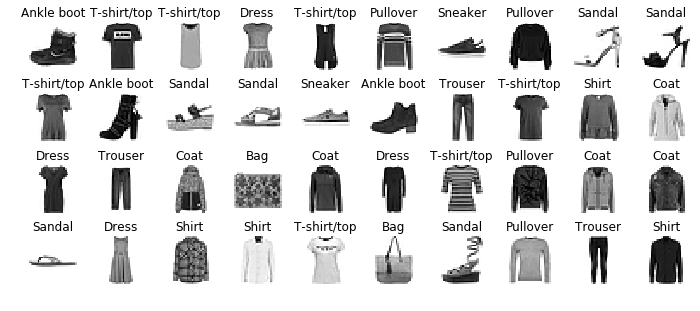

In [31]:
n_rows = 4
n_cols = 10
plt.figure(figsize = (n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap = "binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize = 12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

**OR**

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.layers

In [42]:
hidden1 = model.layers[1]
hidden1

In [43]:
hidden1.name

'dense_3'

In [46]:
model.get_layer('dense_3') is hidden1

True

In [47]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.0260957 ,  0.03249761,  0.05593722, ...,  0.04091412,
        -0.04631817, -0.02813834],
       [ 0.07125302, -0.02136759, -0.04251856, ..., -0.03867264,
        -0.06963521, -0.05146851],
       [ 0.06329951,  0.03660078, -0.0158308 , ..., -0.0631596 ,
        -0.01702745, -0.00754762],
       ...,
       [-0.06919503, -0.05404519, -0.06558667, ..., -0.00795472,
         0.04042177,  0.06157221],
       [ 0.06511006,  0.07307073, -0.00038353, ..., -0.06199232,
         0.0393438 , -0.06854922],
       [ 0.02492436,  0.0532236 ,  0.01067107, ..., -0.03559567,
        -0.06442454, -0.02774644]], dtype=float32)

In [48]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [49]:
weights.shape

(784, 300)

In [50]:
biases.shape

(300,)

In [51]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [70]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 5000 samples, validate on 55000 samples
Epoch 1/30
5000/5000 [==============================] - 3s 512us/step - loss: 0.1754 - acc: 0.9448 - val_loss: 0.4798 - val_acc: 0.8485
Epoch 2/30
5000/5000 [==============================] - 2s 473us/step - loss: 0.1669 - acc: 0.9504 - val_loss: 0.4785 - val_acc: 0.8456
Epoch 3/30
5000/5000 [==============================] - 2s 473us/step - loss: 0.1683 - acc: 0.9500 - val_loss: 0.4816 - val_acc: 0.8476
Epoch 4/30
5000/5000 [==============================] - 2s 470us/step - loss: 0.1590 - acc: 0.9552 - val_loss: 0.4919 - val_acc: 0.8447
Epoch 5/30
5000/5000 [==============================] - 2s 460us/step - loss: 0.1570 - acc: 0.9548 - val_loss: 0.5186 - val_acc: 0.8336
Epoch 6/30
5000/5000 [==============================] - 2s 465us/step - loss: 0.1586 - acc: 0.9486 - val_loss: 0.5461 - val_acc: 0.8383
Epoch 7/30
5000/5000 [==============================] - 2s 459us/step - loss: 0.1570 - acc: 0.9492 - val_loss: 0.5890 - val_acc: 0.8239

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 5000,
 'steps': None,
 'validation_steps': None,
 'verbose': 1}

In [73]:
history.epoch[:5]

[0, 1, 2, 3, 4]

In [74]:
history.history

{'acc': [0.9448,
  0.9504,
  0.95,
  0.9552,
  0.9548,
  0.9486,
  0.9492,
  0.9526,
  0.95,
  0.9564,
  0.9564,
  0.9564,
  0.9558,
  0.9596,
  0.955,
  0.9574,
  0.9616,
  0.9596,
  0.9598,
  0.9622,
  0.9608,
  0.963,
  0.962,
  0.9646,
  0.9624,
  0.968,
  0.9652,
  0.9632,
  0.9686,
  0.967],
 'loss': [0.1753633601427078,
  0.16692601482868194,
  0.1682692233324051,
  0.15899397564530374,
  0.15703924816846848,
  0.1585779419183731,
  0.1570442094564438,
  0.1521025405406952,
  0.1584560399889946,
  0.1503567211985588,
  0.1436868385076523,
  0.1495301857471466,
  0.14789509885311128,
  0.1411757529884577,
  0.14873621201515197,
  0.14461903991699218,
  0.13624492441415786,
  0.13468658224344254,
  0.13653679294586182,
  0.12953660229444502,
  0.13183316848278046,
  0.12660247473716735,
  0.12921654212474823,
  0.12696554313376546,
  0.13107603429555892,
  0.12233842308521271,
  0.11826180015206338,
  0.1277181262731552,
  0.11484499058127404,
  0.1179760050714016],
 'val_acc': [0

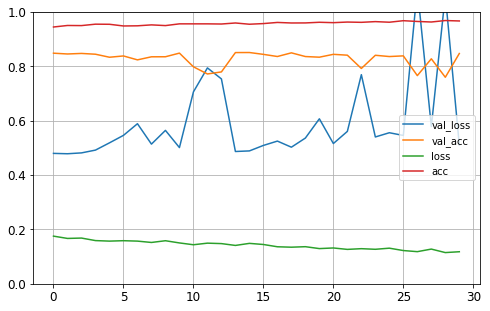

In [75]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [76]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 39us/step


[3.184693244552612, 0.8001]

In [78]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [81]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [82]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

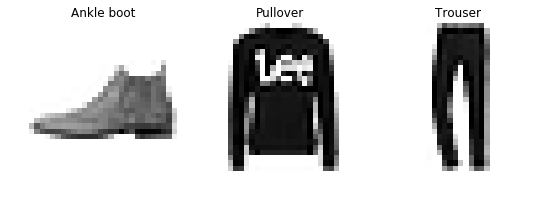

In [84]:
n_rows = 1
n_cols = 3
plt.figure(figsize = (n_cols * 3, n_rows * 3))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap = "binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_test[index]], fontsize = 12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

***Regression***

In [157]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [158]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing["data"], housing["target"])
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [159]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [160]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [161]:
X_train.shape[1:]

(8,)

In [91]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_val, y_val))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 49us/step - loss: 1.1057 - val_loss: 0.5479
Epoch 2/20
11610/11610 [==============================] - 0s 32us/step - loss: 1.2678 - val_loss: 0.4870
Epoch 3/20
11610/11610 [==============================] - 0s 33us/step - loss: 0.4930 - val_loss: 0.5414
Epoch 4/20
11610/11610 [==============================] - 0s 32us/step - loss: 0.4455 - val_loss: 0.3929
Epoch 5/20
11610/11610 [==============================] - 0s 32us/step - loss: 0.4117 - val_loss: 0.3876
Epoch 6/20
11610/11610 [==============================] - 0s 32us/step - loss: 0.4015 - val_loss: 0.3769
Epoch 7/20
11610/11610 [==============================] - 0s 33us/step - loss: 0.3989 - val_loss: 0.3764
Epoch 8/20
11610/11610 [==============================] - 0s 32us/step - loss: 0.3926 - val_loss: 0.3718
Epoch 9/20
11610/11610 [==============================] - 0s 32us/step - loss: 0.3868 - val_loss: 0.3677
Epoch 

In [92]:
mse_test

0.3578335714663646

In [93]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 20,
 'metrics': ['loss', 'val_loss'],
 'samples': 11610,
 'steps': None,
 'validation_steps': None,
 'verbose': 1}

In [94]:
history.history

{'loss': [1.105666008907387,
  1.2677589136757386,
  0.492960241290642,
  0.44545401182285577,
  0.4116706028773187,
  0.40154921636306246,
  0.3988724130479351,
  0.39255916521941453,
  0.38677885863516065,
  0.3821852838474548,
  0.3823537046081747,
  0.38116063101347103,
  0.37751490060467846,
  0.3787041958604364,
  0.37212090745350085,
  0.372393982231771,
  0.3701538502194571,
  0.37066272889407514,
  0.37848038532218475,
  0.3649585146363905],
 'val_loss': [0.5478896946716062,
  0.48700637148948295,
  0.5413703060581394,
  0.3928633645369409,
  0.3875938989549336,
  0.37689439737519553,
  0.3764384098755297,
  0.37175409596711784,
  0.3677070631845361,
  0.3638416927914287,
  0.3615226058996925,
  0.3618399749276558,
  0.36459634416479164,
  0.35848414036192633,
  0.35933705679205963,
  0.3659134576949038,
  0.3536282114819347,
  0.3581904361568372,
  0.3508175761200661,
  0.3554181328962632]}

### ***Non Sequential API- Functional API***

In [113]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output])

In [114]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 8)            0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 30)           930         dense_14[0][0]                   
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_15[0][0]                   
__________

In [106]:
model.layers

In [115]:
model.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_val, y_val))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 76us/step - loss: 2.1593 - val_loss: 0.8916
Epoch 2/20
11610/11610 [==============================] - 0s 40us/step - loss: 0.8255 - val_loss: 0.7621
Epoch 3/20
11610/11610 [==============================] - 0s 40us/step - loss: 0.7394 - val_loss: 0.7030
Epoch 4/20
11610/11610 [==============================] - 0s 40us/step - loss: 0.6877 - val_loss: 0.6588
Epoch 5/20
11610/11610 [==============================] - 0s 40us/step - loss: 0.6517 - val_loss: 0.6282
Epoch 6/20
11610/11610 [==============================] - 0s 40us/step - loss: 0.6223 - val_loss: 0.6031
Epoch 7/20
11610/11610 [==============================] - 0s 41us/step - loss: 0.5995 - val_loss: 0.5817
Epoch 8/20
11610/11610 [==============================] - 0s 41us/step - loss: 0.5810 - val_loss: 0.5650
Epoch 9/20
11610/11610 [==============================] - 0s 41us/step - loss: 0.5648 - val_loss: 0.5489
Epoch 

In [116]:
mse_test

0.45607281636822133

**Multiple Inputs**

In [117]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = output)

In [118]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         (None, 6)            0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         (None, 5)            0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 30)           930         dense_17[0][0]                   
__________________________________________________________________________________________________
concatenat

In [123]:
model.layers

In [120]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr=1e-3))

In [121]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [122]:
history = model.fit((X_train_A, X_train_B), y_train, epochs = 20, validation_data = ((X_val_A, X_val_B), y_val))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 84us/step - loss: 1.9676 - val_loss: 0.9824
Epoch 2/20
11610/11610 [==============================] - 0s 40us/step - loss: 0.8604 - val_loss: 0.7564
Epoch 3/20
11610/11610 [==============================] - 0s 41us/step - loss: 0.7138 - val_loss: 0.6715
Epoch 4/20
11610/11610 [==============================] - 0s 42us/step - loss: 0.6494 - val_loss: 0.6222
Epoch 5/20
11610/11610 [==============================] - 0s 42us/step - loss: 0.6082 - val_loss: 0.5868
Epoch 6/20
11610/11610 [==============================] - 0s 42us/step - loss: 0.5777 - val_loss: 0.5604
Epoch 7/20
11610/11610 [==============================] - 0s 42us/step - loss: 0.5550 - val_loss: 0.5388
Epoch 8/20
11610/11610 [==============================] - 0s 42us/step - loss: 0.5376 - val_loss: 0.5233
Epoch 9/20
11610/11610 [==============================] - 0s 42us/step - loss: 0.5233 - val_loss: 0.5128
Epoch 

In [124]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 20,
 'metrics': ['loss', 'val_loss'],
 'samples': 11610,
 'steps': None,
 'validation_steps': None,
 'verbose': 1}

In [125]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

5160/5160 [==============================] - 0s 19us/step


In [126]:
mse_test

0.4454769575318625

In [127]:
y_pred = model.predict((X_new_A, X_new_B))

In [128]:
y_pred

array([[2.6377578],
       [2.5114546],
       [3.3146057]], dtype=float32)

In [129]:
y_new

array([9, 2, 1], dtype=uint8)

**Multiple Outputs**

In [137]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name = "main_output")(concat)
aux_output = keras.layers.Dense(1, name = "auxiliary_output")(hidden2)
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

In [138]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         (None, 6)            0                                            
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         (None, 5)            0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 30)           930         dense_24[0][0]                   
__________________________________________________________________________________________________
concatenat

In [139]:
model.layers

In [140]:
model.compile(loss = ["mse", "mse"], loss_weights = [0.9, 0.1], optimizer = keras.optimizers.SGD(lr=1e-3))

In [141]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs = 20, 
                    validation_data = ([X_val_A, X_val_B], [y_val, y_val]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 118us/step - loss: 1.9827 - main_output_loss: 1.7448 - auxiliary_output_loss: 4.1241 - val_loss: 1.0042 - val_main_output_loss: 0.7861 - val_auxiliary_output_loss: 2.9671
Epoch 2/20
11610/11610 [==============================] - 1s 55us/step - loss: 0.9211 - main_output_loss: 0.7380 - auxiliary_output_loss: 2.5696 - val_loss: 0.8219 - val_main_output_loss: 0.6711 - val_auxiliary_output_loss: 2.1790
Epoch 3/20
11610/11610 [==============================] - 1s 54us/step - loss: 0.7929 - main_output_loss: 0.6569 - auxiliary_output_loss: 2.0163 - val_loss: 0.7486 - val_main_output_loss: 0.6307 - val_auxiliary_output_loss: 1.8096
Epoch 4/20
11610/11610 [==============================] - 1s 57us/step - loss: 0.7351 - main_output_loss: 0.6223 - auxiliary_output_loss: 1.7498 - val_loss: 0.7067 - val_main_output_loss: 0.6031 - val_auxiliary_output_loss: 1.6389
Epoch 5/20
11610/11610 [==

In [142]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 20,
 'metrics': ['loss',
  'main_output_loss',
  'auxiliary_output_loss',
  'val_loss',
  'val_main_output_loss',
  'val_auxiliary_output_loss'],
 'samples': 11610,
 'steps': None,
 'validation_steps': None,
 'verbose': 1}

In [143]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

5160/5160 [==============================] - 0s 26us/step


In [144]:
total_loss, main_loss, aux_loss

(0.5239139781903851, 0.4581315745678983, 1.1159557045892228)

In [145]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [147]:
y_pred_main, y_pred_aux, y_new

(array([[2.5331333],
        [2.5197074],
        [3.3657305]], dtype=float32), array([[2.1387827],
        [2.4847882],
        [2.0132048]], dtype=float32), array([9, 2, 1], dtype=uint8))

### ***Subclassing API***

In [148]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [150]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_val_A, X_val_B), (y_val, y_val)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 117us/step - loss: 2.5339 - output_1_loss: 2.3849 - output_2_loss: 3.8742 - val_loss: 1.2274 - val_output_1_loss: 1.0446 - val_output_2_loss: 2.8728
Epoch 2/10
11610/11610 [==============================] - 1s 61us/step - loss: 1.0520 - output_1_loss: 0.8886 - output_2_loss: 2.5225 - val_loss: 0.8640 - val_output_1_loss: 0.7412 - val_output_2_loss: 1.9688
Epoch 3/10
11610/11610 [==============================] - 1s 56us/step - loss: 0.8222 - output_1_loss: 0.7028 - output_2_loss: 1.8971 - val_loss: 0.7423 - val_output_1_loss: 0.6505 - val_output_2_loss: 1.5683
Epoch 4/10
11610/11610 [==============================] - 1s 58us/step - loss: 0.7353 - output_1_loss: 0.6392 - output_2_loss: 1.6005 - val_loss: 0.6841 - val_output_1_loss: 0.6081 - val_output_2_loss: 1.3685
Epoch 5/10
11610/11610 [==============================] - 1s 53us/step - loss: 0.6887 - output_1_loss: 0.6047 - ou

In [151]:
model = WideAndDeepModel(30, activation="relu")

### ***Saving & Loading Models***

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [15]:
X_new = X_test[:3]
y_new = y_test[:3]

In [16]:
np.random.seed(42)
# tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  

In [18]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.4119 - val_loss: 1.1847
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6658 - val_loss: 0.6214
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5995 - val_loss: 0.5649
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5578 - val_loss: 0.5224
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5267 - val_loss: 0.5243
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5026 - val_loss: 0.5149
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4829 - val_loss: 0.5208
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4671 - val_loss: 0.5345
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4546 - val_loss: 0.4997
Epoch 10/10
162/162 [==============================] - 0s 988us/step - loss: 0.4349


In [19]:
path_ = "/Users/cmeena/Desktop/ML Practice/TensorFlow Developer/Aurelion Book/Ch 10/"

In [20]:
model.save(path_+"my_keras_model.h5")

In [21]:
model = keras.models.load_model(path_+"my_keras_model.h5")

In [22]:
model.predict(X_new)

array([[0.69530135],
       [1.5559335 ],
       [3.6128306 ]], dtype=float32)

In [23]:
!pwd

/Users/cmeena/Desktop/ML Practice/TensorFlow Developer/Aurelion Book/Ch 10


In [24]:
model.save_weights(path_+"my_keras_weights.ckpt")

In [25]:
model.load_weights(path_+"my_keras_weights.ckpt")

### ***Callbacks***

In [26]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [27]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint(path_+"my_keras_model.h5")
history = model.fit(X_train, y_train, epochs = 20, callbacks = [checkpoint_cb])
mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2183
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7800
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6698
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6280
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5949
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5663
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5419
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5205
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5021
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4862
Epoch 11/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4730
Epoch 12/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4613
Epoch 13/20
363/363 [====

0.3977367877960205

In [28]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint(path_+"my_keras_model.h5", save_best_only = True)
history = model.fit(X_train, y_train, epochs = 20, callbacks = [checkpoint_cb], validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4057 - val_loss: 0.3865
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4022 - val_loss: 0.3837
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3988 - val_loss: 0.4005
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3958 - val_loss: 0.3977
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3933 - val_loss: 0.4028
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3905 - val_loss: 0.3704
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3879 - val_loss: 0.3896
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3854 - val_loss: 0.4223
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3837 - val_loss: 0.3803
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3813 - val_loss: 0.4088

0.3614518940448761

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  

In [30]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.8562 - val_loss: 1.0100
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.7041 - val_loss: 0.6415
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6287 - val_loss: 0.5932
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5825 - val_loss: 0.5456
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5457 - val_loss: 0.5095
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5155 - val_loss: 0.4821
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4912 - val_loss: 0.4625
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4717 - val_loss: 0.4515
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4560 - val_loss: 0.4453
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4433 - val_lo

0.386422336101532

### ***TensorBoard for Visualization***

In [31]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [32]:
!ls

Neural Nets with Keras.ipynb
checkpoint
enviroment_name
my_keras_model.h5
my_keras_weights.ckpt.data-00000-of-00001
my_keras_weights.ckpt.index
my_logs


In [41]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [52]:
run_logdir = get_run_logdir()
print(run_logdir)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid), callbacks = [tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
mse_test

./my_logs/run_2020_10_13-18_37_07
Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 1.4581 - val_loss: 0.7883
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7368 - val_loss: 0.7306
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6516 - val_loss: 0.6501
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5951 - val_loss: 0.5551
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5536 - val_loss: 0.5025
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5199 - val_loss: 0.4728
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4940 - val_loss: 0.4497
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4730 - val_loss: 0.4359
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4563 - val_loss: 0.4267
Epoch 10/30
363/363 [==============================] - 1s 1ms/step

0.37279757857322693

In [54]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [57]:
%tensorboard --logdir=./my_logs --port=6006

TypeError: _repr_pretty_() takes 1 positional argument but 3 were given

TypeError: _repr_pretty_() takes 1 positional argument but 3 were given

### ***Fine-tuning Hyperparameters***

In [58]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [60]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [61]:
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 10)

In [62]:
history = keras_reg.fit(X_train, y_train, epochs = 100, 
                        validation_data = (X_valid, y_valid), 
                        callbacks = [earlystopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4060 - val_l

363/363 [==============================] - 1s 2ms/step - loss: 0.3383 - val_loss: 0.3432
Epoch 82/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3371 - val_loss: 0.3211
Epoch 83/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3367 - val_loss: 0.3342
Epoch 84/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3362 - val_loss: 0.4136
Epoch 85/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3369 - val_loss: 0.3285
Epoch 86/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3359 - val_loss: 0.3440
Epoch 87/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3357 - val_loss: 0.3733
Epoch 88/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3355 - val_loss: 0.3188
Epoch 89/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3346 - val_loss: 0.3492
Epoch 90/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3348 - val_loss: 

In [63]:
mse_test = keras_reg.score(X_test, y_test)
mse_test

162/162 [==============================] - 0s 1ms/step - loss: 0.3409


-0.3408546447753906

In [64]:
y_pred = keras_reg.predict(X_new)

In [65]:
y_pred

array([0.5888452, 1.5484407, 4.1112185], dtype=float32)

In [66]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [67]:
params = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1,100),
    "learning_rate": [3e-4, 3e-2]
}

In [68]:
rnd_search_cv = RandomizedSearchCV(keras_reg, params, n_iter = 10, cv = 3)
history = rnd_search_cv.fit(X_train, y_train, epochs = 100, 
                            validation_data = (X_valid, y_valid), 
                            callbacks = [earlystopping_cb])

Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6871 - val_loss: 0.4450
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4781 - val_loss: 0.6098
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4634 - val_loss: 0.4164
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4627 - val_loss: 0.4137
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4560 - val_loss: 0.4341
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4568 - val_loss: 0.4844
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4839 - val_loss: 0.4245
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4483 - val_loss: 0.4555
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4582 - val_loss: 0.4696
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4562 - val_lo

242/242 [==============================] - 0s 1ms/step - loss: 0.4134 - val_loss: 0.3662
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.3668
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4162 - val_loss: 0.3805
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4215 - val_loss: 0.3728
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4128 - val_loss: 0.3672
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4140 - val_loss: 0.3718
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.3762
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4142 - val_loss: 0.3751
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4170 - val_loss: 0.3685
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4119 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3716 - val_loss: 0.6705
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3717 - val_loss: 0.7766
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3647 - val_loss: 0.5780
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3626 - val_loss: 0.4689
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3591 - val_loss: 0.5263
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3574 - val_loss: 0.4438
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3550 - val_loss: 0.5500
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3535 - val_loss: 0.5119
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3618 - val_loss: 0.3589
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3545 - val_loss: 0.4

242/242 [==============================] - 0s 1ms/step - loss: 0.3726 - val_loss: 0.3690
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3733 - val_loss: 0.3498
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3723 - val_loss: 0.3606
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3698 - val_loss: 0.3752
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3676 - val_loss: 0.3534
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3679 - val_loss: 0.3476
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3665 - val_loss: 0.3483
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3659 - val_loss: 0.3485
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3643 - val_loss: 0.3424
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3639 - val_loss: 

Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3728 - val_loss: 0.4277
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3730 - val_loss: 0.4020
Epoch 28/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3710 - val_loss: 0.3955
Epoch 29/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3716 - val_loss: 0.4076
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3727 - val_loss: 0.4273
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3685 - val_loss: 0.3767
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3674 - val_loss: 0.3769
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3672 - val_loss: 0.3879
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3648 - val_loss: 0.3933
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3645

242/242 [==============================] - 0s 1ms/step - loss: 0.3433 - val_loss: 0.3243
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3409 - val_loss: 0.3290
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3394 - val_loss: 0.3272
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3366 - val_loss: 0.3219
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3364 - val_loss: 0.3222
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3364 - val_loss: 0.3198
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3323 - val_loss: 0.3145
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3318 - val_loss: 0.3157
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3307 - val_loss: 0.3286
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3283 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3531 - val_loss: 0.3594
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3493 - val_loss: 0.3746
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3507 - val_loss: 0.3515
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3467 - val_loss: 0.3589
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3462 - val_loss: 0.3550
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3434 - val_loss: 0.3633
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3409 - val_loss: 0.3444
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3401 - val_loss: 0.3246
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3375 - val_loss: 0.3407
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3359 - val_loss: 

Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5389 - val_loss: 0.4978
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5344 - val_loss: 0.4935
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5301 - val_loss: 0.4896
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5259 - val_loss: 0.4858
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5219 - val_loss: 0.4824
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5181 - val_loss: 0.4792
Epoch 36/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5145 - val_loss: 0.4758
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5109 - val_loss: 0.4730
Epoch 38/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5075 - val_loss: 0.4699
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5041

242/242 [==============================] - 0s 1ms/step - loss: 2.4438 - val_loss: 2.5087
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4335 - val_loss: 1.8495
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0351 - val_loss: 1.3873
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8770 - val_loss: 1.0801
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8095 - val_loss: 0.8914
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7752 - val_loss: 0.7919
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7546 - val_loss: 0.7359
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7398 - val_loss: 0.7127
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7277 - val_loss: 0.6999
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7170 - val_loss: 0.6923


242/242 [==============================] - 0s 1ms/step - loss: 0.4434 - val_loss: 0.4236
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4423 - val_loss: 0.4233
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4411 - val_loss: 0.4229
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4400 - val_loss: 0.4224
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4389 - val_loss: 0.4213
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4378 - val_loss: 0.4219
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4367 - val_loss: 0.4208
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4357 - val_loss: 0.4209
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4347 - val_loss: 0.4204
Epoch 91/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4337 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.5712 - val_loss: 1.5443
Epoch 40/100
121/121 [==============================] - 0s 2ms/step - loss: 0.5999
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 8.2921 - val_loss: 44.0735
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 6.2340 - val_loss: 29.6115
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 4.7744 - val_loss: 20.1524
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 3.7309 - val_loss: 14.0206
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 2.9764 - val_loss: 9.8647
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 2.4263 - val_loss: 7.1321
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 2.0222 - val_loss: 5.3141
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 1.7235 - val_loss: 4.1068
Epoch 9/100
242/

242/242 [==============================] - 0s 1ms/step - loss: 0.4457 - val_loss: 0.4209
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4430 - val_loss: 0.4183
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4403 - val_loss: 0.4167
Epoch 45/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4379 - val_loss: 0.4141
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4355 - val_loss: 0.4114
Epoch 47/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4333 - val_loss: 0.4103
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4311 - val_loss: 0.4087
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4290 - val_loss: 0.4070
Epoch 50/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4271 - val_loss: 0.4054
Epoch 51/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4251 - val_loss: 

Epoch 22/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5632 - val_loss: 1.2146
Epoch 23/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5556 - val_loss: 1.0961
Epoch 24/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5484 - val_loss: 0.9930
Epoch 25/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5414 - val_loss: 0.8995
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5347 - val_loss: 0.8213
Epoch 27/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5282 - val_loss: 0.7576
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5219 - val_loss: 0.6945
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5158 - val_loss: 0.6573
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5103 - val_loss: 0.6061
Epoch 31/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5047

242/242 [==============================] - 0s 1ms/step - loss: 0.6144 - val_loss: 0.5799
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6019 - val_loss: 0.5671
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5899 - val_loss: 0.5585
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5788 - val_loss: 0.5498
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5683 - val_loss: 0.5399
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5583 - val_loss: 0.5240
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5489 - val_loss: 0.5172
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5398 - val_loss: 0.5090
Epoch 19/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5311 - val_loss: 0.4976
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5231 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/100
121/121 [==============================] - 0s 882us/step - loss: nan
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6646 - val_loss: 0.5222
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4410 - val_loss: 0.7222
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4024 - val_loss: 1.3233
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3947 - val_loss: 0.5551
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3896 - val_loss: 0.4478
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3806 - val_loss: 0.8639
Epoch 7/100
242/242 [=================

242/242 [==============================] - 0s 1ms/step - loss: 0.3327 - val_loss: 0.3191
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3356 - val_loss: 0.3154
Epoch 58/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3336 - val_loss: 0.3201
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3289 - val_loss: 0.3186
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3307 - val_loss: 0.3175
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3297 - val_loss: 0.3746
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3315 - val_loss: 0.3111
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3285 - val_loss: 0.3183
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3333 - val_loss: 0.3320
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3296 - val_loss: 

Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4658 - val_loss: 0.4462
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4643 - val_loss: 0.4449
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4629 - val_loss: 0.4438
Epoch 58/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4615 - val_loss: 0.4436
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4601 - val_loss: 0.4421
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4588 - val_loss: 0.4406
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4575 - val_loss: 0.4402
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4563 - val_loss: 0.4402
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4550 - val_loss: 0.4390
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4538

242/242 [==============================] - 0s 1ms/step - loss: 0.5481 - val_loss: 0.6385
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5427 - val_loss: 0.6869
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5375 - val_loss: 0.7504
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5325 - val_loss: 0.8134
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5277 - val_loss: 0.8830
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5231 - val_loss: 0.9462
Epoch 40/100
121/121 [==============================] - 0s 817us/step - loss: 0.5408
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 4.8328 - val_loss: 13.3380
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 2.8366 - val_loss: 11.2300
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.8664 - val_loss: 8.9264
Epoch 4/100

Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4567 - val_loss: 0.4425
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4554 - val_loss: 0.4427
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4541 - val_loss: 0.4422
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4528 - val_loss: 0.4411
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4516 - val_loss: 0.4395
Epoch 79/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4505 - val_loss: 0.4397
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4493 - val_loss: 0.4408
Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4483 - val_loss: 0.4402
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4472 - val_loss: 0.4391
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4462

242/242 [==============================] - 0s 1ms/step - loss: 0.3073 - val_loss: 0.3110
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3061 - val_loss: 0.3075
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3079 - val_loss: 1.9604
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3054 - val_loss: 0.2939
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3052 - val_loss: 1.5839
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3059 - val_loss: 0.3175
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3069 - val_loss: 1.9204
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3054 - val_loss: 0.4824
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3027 - val_loss: 0.3182
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3077 - val_loss: 

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x13c7dbcc0>, as the constructor either does not set or modifies parameter n_neurons

In [72]:
mse_test = keras_reg.score(X_test, y_test)
mse_test

162/162 [==============================] - 0s 1ms/step - loss: 0.3409


-0.3408546447753906

In [73]:
y_pred = keras_reg.predict(X_new)
y_pred

array([0.5888452, 1.5484407, 4.1112185], dtype=float32)

In [74]:
rnd_search_cv.best_params_

{'learning_rate': 0.03, 'n_hidden': 1, 'n_neurons': 34}

In [75]:
rnd_search_cv.best_score_

-0.3477271596590678

In [76]:
model = rnd_search_cv.best_estimator_.model

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [77]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3728


0.37279757857322693

### ***Exercise***

***Question 10***

In [128]:
from sklearn.model_selection import train_test_split
from keras.datasets.mnist import load_data

In [129]:
(X_train_full, y_train_full), (X_test, y_test) = load_data()

In [130]:
X_train_full.shape

(60000, 28, 28)

In [131]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

X_train.shape, X_valid.shape, X_test.shape

((55000, 28, 28), (5000, 28, 28), (10000, 28, 28))

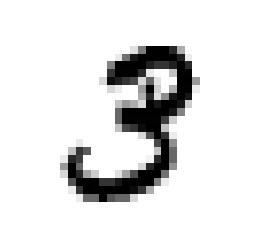

In [132]:
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

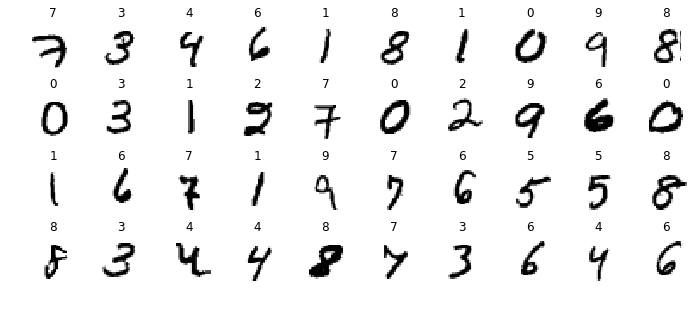

In [133]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [134]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [135]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [136]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [137]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [138]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.6030 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

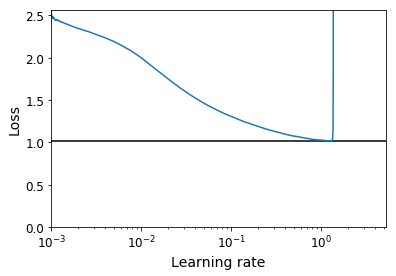

In [139]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [140]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [141]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [142]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

In [143]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [147]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0255 - accuracy: 0.0990 - val_loss: 0.0725 - val_accuracy: 0.0960
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0204 - accuracy: 0.0991 - val_loss: 0.0715 - val_accuracy: 0.0958
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0121 - accuracy: 0.0990 - val_loss: 0.0729 - val_accuracy: 0.0956
Epoch 4/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0082 - accuracy: 0.0990 - val_loss: 0.0727 - val_accuracy: 0.0960
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0086 - accuracy: 0.0989 - val_loss: 0.0739 - val_accuracy: 0.0950
Epoch 6/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0085 - accuracy: 0.0990 - val_loss: 0.0757 - val_accuracy: 0.0954
Epoch 7/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0107 - accuracy: 0.0990 - val_loss: 0.0784 - val_ac

In [149]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.0986


[0.0733974277973175, 0.09860000014305115]

In [146]:
%tensorboard --logdir=./my_mnist_logs --port=6006

TypeError: _repr_pretty_() takes 1 positional argument but 3 were given

TypeError: _repr_pretty_() takes 1 positional argument but 3 were given